In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import BoxStyle
from matplotlib.path import Path
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'
from scipy import stats

%matplotlib inline

In [2]:
carbon_df = pd.read_csv('../data/carbonNitrogenIsotope.csv')
print(carbon_df)

   Name mutant_wt     Line  Weight/Vol     Beam Area  N (Sam) ug  \
0   1_1        wt       wt        1.59  5.840000e-08  107.760690   
1   1_2        wt       wt        1.42  5.530000e-08  101.995067   
2   1_3        wt       wt        1.62  5.970000e-08  109.890656   
3   1_4        wt       wt        1.48  5.660000e-08  104.071927   
4   1_5        wt       wt        1.12  4.190000e-08   76.864136   
5   1_6        wt       wt        1.79  6.940000e-08  127.058082   
6   2_1    mutant  1.10.18        1.58  5.890000e-08  107.787099   
7   2_2    mutant  1.10.18        1.23  4.830000e-08   88.132875   
8   2_3    mutant  1.10.18        1.73  6.850000e-08  124.816397   
9   2_4    mutant  1.10.18        1.86  7.360000e-08  134.097182   
10  2_5    mutant  1.10.18        1.47  5.820000e-08  106.163139   
11  2_6    mutant  1.10.18        1.41  5.190000e-08   94.632456   
12  3_1    mutant  1.10.19        1.24  4.750000e-08   86.784892   
13  3_2    mutant  1.10.19        1.69  6.480000

#### Test for a significant difference in the carbon/nitrogen ratio between each line and wild type plants

In [3]:
for line in ['1.10.18', '1.10.19', '1.10.32', '1.12.2']:
    t_test = stats.ttest_ind(carbon_df[(carbon_df['Line'] == line)]['C/N ratio'].to_list(),
                             carbon_df[(carbon_df['Line'] == 'wt')]['C/N ratio'].to_list(), 
                             equal_var=True)
    
    print(line)
    print(t_test)

1.10.18
Ttest_indResult(statistic=-2.572667518681293, pvalue=0.02776333881153151)
1.10.19
Ttest_indResult(statistic=-1.01661036360404, pvalue=0.33330383054299406)
1.10.32
Ttest_indResult(statistic=-0.8773073945931101, pvalue=0.4009053005269272)
1.12.2
Ttest_indResult(statistic=-1.9831666577346878, pvalue=0.07547404522077693)


#### Test for a significant difference in the carbon/nitrogen ratio between each mutant and wild type plants

In [4]:
t_test = stats.ttest_ind(carbon_df[(carbon_df['mutant_wt'] == 'mutant')]['C/N ratio'].to_list(),
                             carbon_df[(carbon_df['mutant_wt'] == 'wt')]['C/N ratio'].to_list(), 
                             equal_var=True)
    
print(t_test)

Ttest_indResult(statistic=-2.061504700643912, pvalue=0.04864893090847168)


### Plot the data

In [5]:
line_dict = {'wt': 'wild type', '1.10.18': 'Line 1', '1.10.19': 'Line 2', '1.10.32': 'Line 3', '1.12.2': 'Line 4'}
carbon_df['Line_name'] = carbon_df['Line'].map(line_dict)
for col in carbon_df.columns:
    print(col)

Name
mutant_wt
Line
Weight/Vol
Beam Area
N (Sam) ug
15N (Sam) DeltaAir
None (Sam)
Ratio 1
Beam Area.1
C (Sam) ug
13C (Sam) DeltaPDB
C/N ratio
Unnamed: 13
Line_name


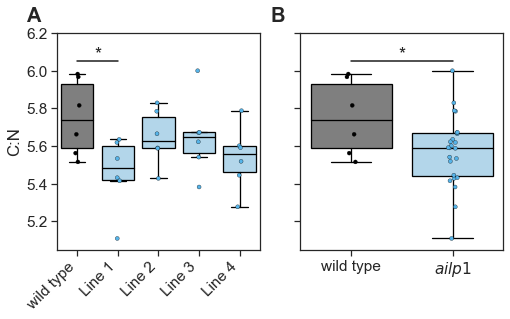

In [11]:
# sns.plotting_context()
sns.set(font_scale = 1.4, font='Arial')
sns.set_style(style='ticks')

fig, axs = plt.subplots(ncols=2, figsize=(8,4), sharey=True)


# Choose hue colour palette
colours = ['#000000', '#56B4E9', '#56B4E9', '#56B4E9', '#56B4E9']

# Comparison of each line

ax0_boxplot = sns.boxplot(x='Line_name', y='C/N ratio', data=carbon_df, ax=axs[0], palette=colours,
           order=['wild type', 'Line 1', 'Line 2', 'Line 3', 'Line 4'], linewidth=1.3, showfliers = False)

ax0_stripplot = sns.stripplot(x='Line_name', y='C/N ratio', data=carbon_df, ax=axs[0], palette=colours, alpha=1,
           order=['wild type', 'Line 1', 'Line 2', 'Line 3', 'Line 4'], jitter=0.05, edgecolor='gray', linewidth=0.3, size=4)

ax0_boxplot.set_xticklabels(['wild type', 'Line 1', 'Line 2', 'Line 3', 'Line 4'], ha='right', rotation=45)

# Wild type vs mutant

ax1_boxplot = sns.boxplot(x='mutant_wt', y='C/N ratio', data=carbon_df, ax=axs[1], palette=colours,
           order=['wt', 'mutant'], linewidth=1.3, showfliers = False)

ax1_stripplot = sns.stripplot(x='mutant_wt', y='C/N ratio', data=carbon_df, ax=axs[1], palette=colours, alpha=1,
           order=['wt', 'mutant'], jitter=0.05, edgecolor='gray', linewidth=0.3, size=4)

ax1_boxplot.set_xticklabels(['wild type', '$\it{ailp1}$'])

# Apply transparency to boxplots

for patch in ax0_boxplot.artists:
    red, green, blue, alpha = patch.get_facecolor()
    patch.set_facecolor((red, green, blue, .5))
for patch in ax1_boxplot.artists:
    red, green, blue, alpha = patch.get_facecolor()
    patch.set_facecolor((red, green, blue, .5))
    
# Axes labels

axs[0].set_xlabel('')
axs[0].set_ylabel('C:N')
axs[1].set_xlabel('')
axs[1].set_ylabel('')


# Subplot labels

labels = ['A', 'B']
for n, ax in enumerate(axs):  
    ax.text(-0.15, 1.05, labels[n], transform=ax.transAxes, 
            size=20, weight='bold')
    
axs[0].plot([0, 1], [6.05, 6.05], 'k')
axs[0].plot([0, 1], [6.15, 6.15], 'w')
axs[0].text(0.5, 6.06, '*', fontsize=18, ha='center')

axs[1].plot([0, 1], [6.05, 6.05], 'k')
axs[1].text(0.5, 6.06, '*', fontsize=18, ha='center')



plt.savefig("../figures/CN_ratio.pdf", transparent=True, dpi=300, bbox_inches='tight')